In [38]:
#pip install lightgbm


In [39]:
import joblib
import pandas as pd
import threading
import lightgbm as lgb

In [40]:
data = pd.read_csv("GLCMResultFinal.csv", low_memory=False)
data = data.drop(['Unnamed: 0','image_type','tbp_tile_type','attribution','copyright_license','lesion_id','iddx_full','patient_id','isic_id'
                 ,"iddx_1","iddx_2","iddx_3","iddx_4","iddx_5","age_approx","mel_thick_mm","7","10","11","13","14"],axis = 1)

In [41]:
data.shape

(400000, 51)

In [42]:
data

,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,female,anterior torso,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,male,head/neck,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,male,anterior torso,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,male,upper extremity,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,male,posterior torso,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,female,posterior torso,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,24.148250,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,male,upper extremity,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,28.916884,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,female,upper extremity,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,29.348627,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,male,upper extremity,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,35.175950,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [43]:
data.columns

Index(['target', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm',
       'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C',
       'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext',
       'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
       'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location',
       'tbp_lv_location_simple', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_mitotic_index',
       'tbp_lv_dnn_lesion_confidence', '0', '1', '2', '3', '4', '5', '6', '8',
       '9', '12', '15'],
      dtype='object')

In [44]:
non_numerical_columns = data.select_dtypes(exclude=['number']).columns

# Convert to a list if needed
non_numerical_columns_list = list(non_numerical_columns)

print(non_numerical_columns_list)

['sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'mel_mitotic_index']


In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [47]:
import pickle

data_new = data
data1 = {}
save_file = open("cases.dat", "wb")

for j in non_numerical_columns_list:
    a = list(set(list(data_new[j])))
    index = 0
    dic = {}
    for i in a:
        dic[i] = index
        index += 1

    data1[j] = dic

pickle.dump(data1, save_file)
save_file.close()

In [48]:
data_file = open("cases.dat", "rb")
cases = pickle.load(data_file)
type(cases)
data_file.close()

In [49]:
for i in cases:
    for j in cases[i]:
        data_new[i] = data_new[i].replace(j, cases[i][j])
        

C:\Users\saiet\AppData\Local\Temp\ipykernel_53936\1112598091.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_new[i] = data_new[i].replace(j, cases[i][j])


In [50]:
data_new

,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,0.0,0,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,1.0,3,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,1.0,0,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,1.0,1,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,1.0,5,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0.0,5,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,24.148250,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,1.0,1,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,28.916884,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,0.0,1,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,29.348627,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,1.0,1,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,35.175950,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [51]:
#data_new.to_csv('DatasetInitalComplete.csv',index=False)

In [52]:
classes = []
for column in non_numerical_columns_list:
    data[column] = le.fit_transform(data[column])
    print(le.classes_)
    classes.append(le.classes_)

[0. 1. 2.]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [53]:
data

,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,0,0,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,1,3,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,1,0,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,1,1,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,1,5,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,5,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,24.148250,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,1,1,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,28.916884,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,0,1,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,29.348627,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,1,1,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,35.175950,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [54]:
data[['sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'mel_mitotic_index']]

,sex,anatom_site_general,tbp_lv_location,tbp_lv_location_simple,mel_mitotic_index
0,0,0,14,7,2
1,1,3,7,3,2
2,1,0,14,7,2
3,1,1,9,1,2
4,1,5,8,2,2
...,...,...,...,...,...
399995,0,5,11,2,2
399996,1,1,2,4,2
399997,0,1,20,1,2
399998,1,1,5,4,2


In [55]:
print(classes)

[array([0., 1., 2.]), array([0, 1, 2, 3, 4, 5], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)]


In [56]:
df_sorted = data.sort_values(by='target',ascending = False)
df_target_1 = data[data['target'] == 1]
df_target_0 = data[data['target'] == 0]

#df_target_0[:392]
batch1 = pd.concat([df_target_1, df_target_0[:]], ignore_index=True)
batch1


,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,0,0,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,1,3,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,1,0,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,1,1,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,1,5,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,5,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,24.148250,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,1,1,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,28.916884,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,0,1,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,29.348627,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,1,1,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,35.175950,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [57]:
#pip install matplotlib

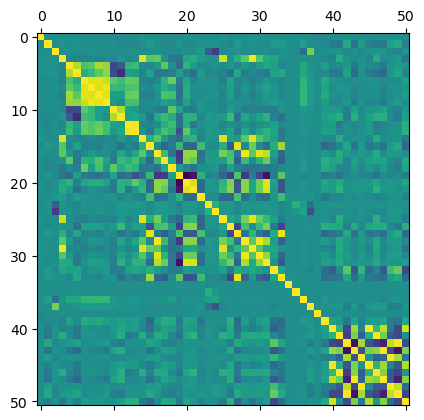

In [58]:
correlation_matrix = batch1.corr()
import matplotlib.pyplot as plt
plt.matshow(correlation_matrix, cmap='viridis')
plt.show()


In [59]:
correlated_pairs = []
threshold = 0.95
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if ((correlation_matrix.iloc[i, j]) > threshold):
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# Print the correlated pairs
print("Pairs of columns with correlation above threshold:")
print(len(correlated_pairs))
for pair in correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} with correlation: {pair[2]:.2f}")

Pairs of columns with correlation above threshold:
9
Columns: tbp_lv_Lext and tbp_lv_L with correlation: 0.96
Columns: tbp_lv_norm_color and tbp_lv_color_std_mean with correlation: 0.96
Columns: tbp_lv_perimeterMM and clin_size_long_diam_mm with correlation: 0.96
Columns: tbp_lv_radial_color_std_max and tbp_lv_norm_color with correlation: 0.96
Columns: 5 and 0 with correlation: 0.97
Columns: 6 and 1 with correlation: 0.99
Columns: 8 and 3 with correlation: 0.97
Columns: 9 and 4 with correlation: 0.98
Columns: 12 and 2 with correlation: 0.98


In [60]:
#to remove : 

In [61]:
#mid_point = len(batch1) // 2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
'''
batch1_first_half = batch1.iloc[:392]
batch1_second_half = batch1.iloc[392:]
test_size_first_half = int(0.1 * len(batch1_first_half))
test_size_second_half = int(0.1 * len(batch1_second_half))
test_first_half = batch1_first_half.sample(n=test_size_first_half, random_state=42)
test_second_half = batch1_second_half.sample(n=test_size_second_half, random_state=42)
test_set = pd.concat([test_first_half, test_second_half])
train_set = batch1.drop(test_set.index)'''
#test_set
scaler = StandardScaler()

train_set, test_set = train_test_split(batch1, test_size=0.2, stratify=batch1['target'], random_state=42)



In [62]:
train_set, test_set = train_test_split(batch1, test_size=0.1, stratify=batch1['target'], random_state=42)
X_train = train_set.drop(columns=['target'])
y_train = train_set['target']
X_test = test_set.drop(columns=['target'])
y_test = test_set['target']
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
#

In [64]:
pip install lightgbm --install-option=--gpu

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\saiet\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\saiet\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\saiet\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\saiet\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\saiet\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --install-option


In [65]:
def trainer(number,batch):
    print(number)
    scaler = StandardScaler()

    train_set, test_set = train_test_split(batch, test_size=0.1, stratify=batch['target'], random_state=42)
    X_trainn = train_set.drop(columns=['target'])
    y_trainn = train_set['target']
    X_testn = test_set.drop(columns=['target'])
    y_testn = test_set['target']
    X_trainn = scaler.fit_transform(X_trainn)
    X_testn = scaler.transform(X_testn)
    
    model = lgb.LGBMClassifier(verbose=-1)
    model.fit(X_trainn, y_trainn)
    #print("model"+str(number))
    name = "model" + str(number) + ".joblib"
    joblib.dump(model, name)
    #predictions = model.predict(X_test)
    #tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    #accuracy = accuracy_score(y_test,predictions)
    #print("model number"+str(i)+" true positives: "+str(tp/(tp+fn)))
    #print("model number"+str(i)+" accuracu: "+str(accuracy))
    
    
    # Make predictions and evaluate
    
    

In [66]:
aefni = pd.concat([df_target_1, df_target_0[1*392:(1*392)+392]], ignore_index=True)
aefni


,target,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,1,2,3,4,5,6,8,9,12,15
0,1,0,0,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,24.907158,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,1,3,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,1,0,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,1,1,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,1,5,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,1,5,4.72,17.853414,17.147987,19.203288,22.290835,26.220424,28.123563,...,0.981522,1.920477,0.391573,6.258970,0.036379,0.880080,0.180370,40.739213,6.924308,0.163467
780,0,1,3,4.80,16.854860,15.079330,20.228420,19.214700,26.330120,24.425210,...,0.974844,1.531558,0.460942,4.161658,0.044776,0.866703,0.241252,21.973096,4.658128,0.173951
781,0,1,4,4.68,21.922880,18.526210,25.760630,23.941150,33.826360,30.272090,...,0.975848,1.594799,0.449893,4.531985,0.045432,0.857732,0.223425,26.747614,5.417615,0.181652
782,0,0,5,4.98,22.266994,16.376268,27.021241,27.834338,35.013805,32.294466,...,0.993208,1.827161,0.413201,5.910226,0.028658,0.961691,0.205365,33.422107,5.914564,0.121359


In [74]:
accuracies = []
tprs = []
finals = []

In [67]:
threads = []
import time

start_time = time.time()

for i in range(0,1019):
       
    thread = threading.Thread(target=trainer, args=(i,pd.concat([df_target_1, df_target_0[i*392:(i*392)+392]], ignore_index=True)))
    threads.append(thread)
    thread.start()
end_time = time.time()
total_time = end_time - start_time
total_time

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

88.15810513496399

In [69]:
def tester(number,X_test,y_test):
    
    filename = "model" + str(number) + ".joblib"
    model_loaded = joblib.load(filename)
    predictions = model_loaded.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print((tp/(tp+fn)))
    tprs.append((tp/(tp+fn)))
    accuracy = accuracy_score(y_test,predictions)
    accuracies.append(accuracy)
    finals.append(((tp/(tp+fn)),accuracy))

In [70]:
'''train_set, test_set = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)
X_test = test_set.drop(columns=['target'])
y_test = test_set['target']
X_test = scaler.transform(X_test)'''
from sklearn.metrics import accuracy_score, confusion_matrix
import time


start_time = time.time()

train_set, test_set = train_test_split(batch1, stratify=batch1['target'], random_state=42)
X_train = train_set.drop(columns=['target'])
y_train = train_set['target']
X_test = test_set.drop(columns=['target'])
y_test = test_set['target']
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

threads = []
for i in range(0,1019):
    thread = threading.Thread(target=tester, args=(i,X_test,y_test))
    threads.append(thread)
    thread.start()
    
    
   

print(max(tprs))
print(max(accuracies))
end_time = time.time()
total_time = end_time - start_time
total_time


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.01.0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.01.0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


116.08258533477783

In [71]:
tprs.sort()
print(tprs)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [72]:
accuracies.sort()
print(accuracies)

1.0
[0.3957, 0.4262, 0.428275, 0.428275, 0.430725, 0.432925, 0.43355, 0.4358, 0.436325, 0.43795, 0.439625, 0.4404, 0.4416, 0.441625, 0.44315, 0.44385, 0.444525, 0.444725, 0.444875, 0.44555, 0.4456, 0.445625, 0.446125, 0.44655, 0.44705, 0.447325, 0.44735, 0.447375, 0.44775, 0.44835, 0.448525, 0.44885, 0.449175, 0.44985, 0.45025, 0.45075, 0.45105, 0.451125, 0.451375, 0.451575, 0.45175, 0.4518, 0.4521, 0.45275, 0.4528, 0.452925, 0.453425, 0.4537, 0.454375, 0.454675, 0.4555, 0.455575, 0.45565, 0.455975, 0.456, 0.456125, 0.45615, 0.45645, 0.4567, 0.45705, 0.45715, 0.457225, 0.458225, 0.458425, 0.458475, 0.4585, 0.45875, 0.4588, 0.458825, 0.458825, 0.45895, 0.45905, 0.459075, 0.4592, 0.459325, 0.459475, 0.4595, 0.4597, 0.459775, 0.459975, 0.4602, 0.460375, 0.460525, 0.460675, 0.460825, 0.46105, 0.461075, 0.4613, 0.461325, 0.461675, 0.461725, 0.46225, 0.46235, 0.462475, 0.46295, 0.463075, 0.463175, 0.46325, 0.4634, 0.4636, 0.46365, 0.463875, 0.464075, 0.4641, 0.4641, 0.464525, 0.464575, 0.464

In [73]:
finals

[(1.0, 0.472375),
 (1.0, 0.550425),
 (1.0, 0.4592),
 (1.0, 0.561175),
 (1.0, 0.508775),
 (1.0, 0.493125),
 (1.0, 0.52025),
 (1.0, 0.4636),
 (1.0, 0.515725),
 (1.0, 0.490925),
 (1.0, 0.52395),
 (1.0, 0.46225),
 (1.0, 0.5652),
 (1.0, 0.5218),
 (1.0, 0.547125),
 (1.0, 0.489675),
 (1.0, 0.48565),
 (1.0, 0.52235),
 (1.0, 0.506),
 (1.0, 0.5117),
 (1.0, 0.48515),
 (1.0, 0.510825),
 (1.0, 0.4999),
 (1.0, 0.5058),
 (1.0, 0.521725),
 (1.0, 0.4935),
 (1.0, 0.4788),
 (1.0, 0.467175),
 (1.0, 0.559425),
 (1.0, 0.4456),
 (1.0, 0.493825),
 (1.0, 0.504175),
 (1.0, 0.487),
 (1.0, 0.48515),
 (1.0, 0.5256),
 (1.0, 0.4756),
 (1.0, 0.523175),
 (1.0, 0.504475),
 (1.0, 0.495275),
 (1.0, 0.501725),
 (1.0, 0.530925),
 (1.0, 0.52465),
 (1.0, 0.4742),
 (1.0, 0.502575),
 (1.0, 0.485275),
 (1.0, 0.45715),
 (1.0, 0.4404),
 (1.0, 0.444725),
 (1.0, 0.505675),
 (1.0, 0.515875),
 (1.0, 0.51655),
 (1.0, 0.510875),
 (1.0, 0.510325),
 (1.0, 0.465475),
 (1.0, 0.474475),
 (1.0, 0.470425),
 (1.0, 0.491475),
 (1.0, 0.567425),


1.0
1.0
1.0
1.0
